<a href="https://colab.research.google.com/github/Benten559/loanRepayment/blob/main/chainedRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from google.colab import drive
# Follow the link, copy and paste the code provided
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load Dataframes
# City of Fresno employee payroll data for 2018:
CoF = pd.read_csv('/content/drive/Shared drives/csci191t-project/ColabNotebooks/tabula-18-Fsalary.csv',dtype={'Job_title':str,'annual_inc':'int64'})
# The two different data sets from the same loan firm:
loans = pd.read_csv('/content/drive/Shared drives/csci191t-project/ColabNotebooks/loan.csv') 
data4 = pd.read_csv('/content/drive/Shared drives/csci191t-project/ColabNotebooks/loanD.csv') 


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# 2016 and 2017 CoF payroll data
#Sheets formatted already for dtypes
CoF16 = pd.read_csv('/content/drive/Shared drives/csci191t-project/ColabNotebooks/Employee-Gross-Wages2016.csv')
CoF17 = pd.read_csv('/content/drive/Shared drives/csci191t-project/ColabNotebooks/Employee-Gross-Wages2017.csv')

In [ ]:
a,b,c = CoF16.annual_inc.mean(),CoF17.annual_inc.mean(),CoF.annual_inc.mean()

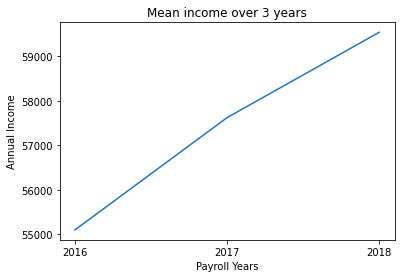

In [7]:
# Some visualizations of raw data
plt.title("Mean income over 3 years")
plt.ylabel("Annual Income")
plt.xlabel("Payroll Years")
plt.plot(['2016','2017','2018'],[a,b,c])

In [9]:
# Both loan firm datasets must used to form one larger dataset 
# All columns must match names to correctly train model
# No remaining NaNs after cleaning/altering
# Notes:
# CoF data needs columns: 'funded_amnt','installment','int_rate','dti','delinq_2yrs','loan_status'
# funded_amnt will be done in sequences to display 
data1 = data4[['annual_inc','funded_amnt','installment','int_rate','dti','delinq_2yrs','loan_status']]
data = loans[['annual_inc','funded_amnt','installment','int_rate','dti','delinq_2yrs','loan_status']]
# The MAIN dataframe for training:
double = pd.merge(data1,data,how='outer')


In [10]:
# 'loan_status' shows whether or not a person defaulted or payed it off completely
# Change loanstatus values to number
#   0 charged off
#   1 Fully Paid
def statclean(x):
    if (x == 'Charged Off'): return 0
    elif (x == 'Fully Paid'):return 1
    elif (x.startswith('Fully', 40)): return 1
    elif (x.startswith('Charged', 40)): return 0
# drops NaNs from df
# Because statclean() can not be executed over NaNs
double = double.dropna() 




In [11]:
# Change string values to integer values (listed in statClean() def)
double.loan_status = double.loan_status.apply(statclean)
# Because statclean() leaves NaNs for some cases that dont match
double = double.dropna() 
#print(double["delinq_2yrs"].max())
#print(double["delinq_2yrs"].min())
#double.groupby('loan_status').size()

In [ ]:
a = double[double['annual_inc'] < 30000]
a = a[a['annual_inc']>1000]
a.describe()

,annual_inc,funded_amnt,installment,int_rate,dti,delinq_2yrs,loan_status
count,75788.000000,75788.000000,75788.000000,75788.000000,75788.000000,75788.000000,75788.000000
mean,22896.970000,6633.197538,220.103568,14.294131,21.797897,0.177548,0.753879
std,4959.063873,3939.166059,122.510074,4.363657,22.185997,0.644526,0.430753
min,1008.000000,500.000000,15.670000,5.310000,0.000000,0.000000,0.000000
25%,20000.000000,4000.000000,141.110000,11.470000,12.800000,0.000000,1.000000
50%,24000.000000,6000.000000,203.590000,13.980000,20.210000,0.000000,1.000000
75%,26880.000000,8450.000000,283.380000,16.990000,27.622500,0.000000,1.000000
max,29999.000000,40000.000000,1566.800000,30.990000,999.000000,39.000000,1.000000


In [12]:
# Adding missing columns to CoF:
# Each loan group is a dataframe under the respective variables
# Grouped by loan_amount: {1000, 5000 , 10000 , 200000 , 30000 } => {CoFX1, CoFX5, CoFX10, CoFX20,CoFX30}

CoF['funded_amnt'] = np.nan 
CoF['installment'] = np.nan
CoF['int_rate'] = np.nan
CoF['dti'] = np.nan
CoF['delinq_2yrs'] = np.nan
CoF['loan_status'] = np.nan



In [ ]:
# Begin  Loan testing:
# choose a group

In [ ]:
#Group 1
CoF['funded_amnt'] = 1000
CoFX = CoF[['annual_inc','funded_amnt']]
 #CoFX1.sample(5)

In [ ]:
#Group 2
CoF['funded_amnt'] = 5000
CoFX = CoF[['annual_inc','funded_amnt']]
 #CoFX2.sample(5)

In [13]:
#Group 3
CoF['funded_amnt'] = 40000
CoFX = CoF[['annual_inc','funded_amnt']]
 #CoFX3.sample(5)

In [14]:
# Begin Logistic Regression: "CELL 1"
# Split the data 
from sklearn.model_selection import train_test_split
X = double[['annual_inc','funded_amnt','installment','int_rate','dti','delinq_2yrs']]
y = double['loan_status']
x_trn, x_tst, y_trn, y_tst = train_test_split(X,y,test_size=.2)

# make model  "CELL 2"
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(max_iter=200)
logReg.fit(x_trn,y_trn)

# Stats on predictor model:    "CELL 3"
predict = logReg.predict(x_tst)
score = logReg.score(x_tst,y_tst)
print("accuracy: ",100*score)

accuracy:  79.94028136663796


In [15]:
#Create Linear regression model,
# we train this model in order to populate the missing 
# variables needed in the employee payroll data set
########################
# uses annual income and funded_amnt to try and predict: installment, int_rate, dti, delinq_2yrs
from sklearn.linear_model import LinearRegression
LinR= LinearRegression(fit_intercept=True,normalize=True)
X = double[['annual_inc','funded_amnt']]#['annual_inc'].values.reshape(-1,1)
y = double[['installment','int_rate','dti','delinq_2yrs']]
x_trn, x_tst,y_trn,y_tst = train_test_split(X,y,test_size=.4) 
LinR.fit(x_trn,y_trn)

# linear regressor stats
predict1= LinR.predict(x_tst)
score = LinR.score(x_tst,y_tst)
print("accuracy: ",100*score) # Currently >90% accuracy

accuracy:  90.87888931082439


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [16]:
# Run Linear regressor
# Creating values for missing CoF variables:
X1Val = LinR.predict(CoFX[['annual_inc','funded_amnt']])

#Load missing dataframe values into CoF
col_names = ['installment','int_rate','dti','delinq_2yrs']
for i in range(len(X1Val)):
  for j in range(0,4):
    CoF.at[i,col_names[j]]=X1Val[i][j]

In [21]:
double.head(15)

,annual_inc,funded_amnt,installment,int_rate,dti,delinq_2yrs,loan_status
100,100000.0,30000,1151.16,22.35,30.46,0.0,1.0
152,45000.0,40000,975.71,16.14,50.53,0.0,1.0
170,100000.0,20000,622.68,7.56,18.92,0.0,1.0
186,38500.0,4500,147.99,11.31,4.64,0.0,1.0
215,450000.0,8425,345.18,27.27,12.37,0.0,1.0
269,57000.0,20000,507.55,17.97,22.18,0.0,1.0
271,45000.0,6600,217.05,11.31,16.21,0.0,1.0
296,42000.0,2500,84.92,13.56,15.09,0.0,1.0
369,60000.0,4000,144.55,17.97,19.10,0.0,1.0
379,24000.0,2700,84.85,8.19,24.95,0.0,1.0


In [20]:
CoF.head(15)

,job_title,annual_inc,funded_amnt,installment,int_rate,dti,delinq_2yrs,loan_status
0,Account Clerk II,2646,40000,1167.787271,16.535586,23.087223,0.229561,0.0
1,Account Clerk II,5845,40000,1167.856303,16.506449,22.999831,0.231437,0.0
2,Account Clerk II,31546,40000,1168.410910,16.272358,22.297717,0.246516,1.0
3,Account Clerk II,36670,40000,1168.521481,16.225687,22.157737,0.249522,1.0
4,Account Clerk II,38297,40000,1168.556591,16.210868,22.113290,0.250477,1.0
5,Account Clerk II,40716,40000,1168.608791,16.188835,22.047207,0.251896,1.0
6,Account Clerk II,42069,40000,1168.637987,16.176512,22.010245,0.252690,1.0
7,Accountant-Auditor I,27963,40000,1168.333591,16.304993,22.395600,0.244414,1.0
8,Accountant-Auditor I,44721,40000,1168.695215,16.152357,21.937796,0.254246,1.0
9,Accountant-Auditor I,50773,40000,1168.825812,16.097233,21.772464,0.257797,1.0


In [17]:
#Run Logistic prediction model on newly filled CoF dataframe
# Log(CoF):
X1loanX = CoF[['annual_inc','funded_amnt','installment','int_rate','dti','delinq_2yrs']]
X1LoanY = logReg.predict(X1loanX)

# Write predictions into CoF
for i in range(len(X1LoanY)):
  CoF.at[i,'loan_status'] = X1LoanY[i]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b6826e6a0>,
      dtype=object)

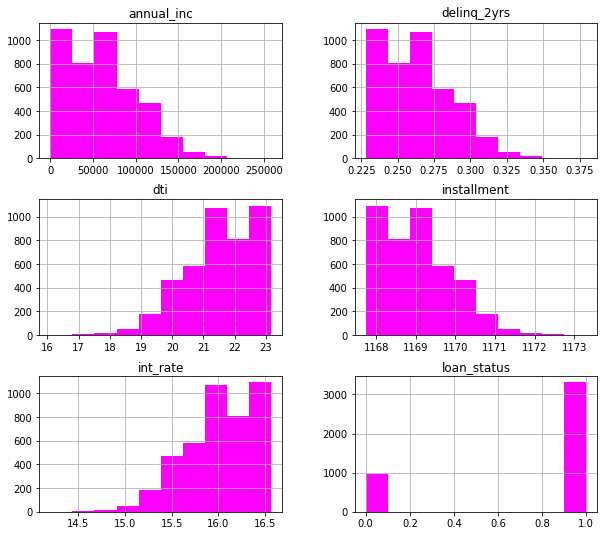

In [22]:
CoF[['annual_inc','delinq_2yrs','dti','installment','int_rate','loan_status']].hist(figsize=(10,9),color='magenta')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


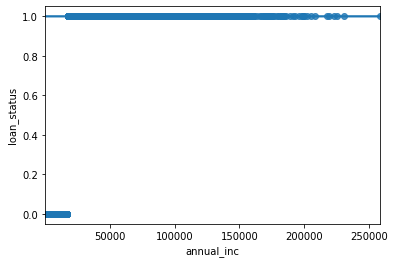

In [23]:
# sns.scatterplot(hue='loan_status',x= 'annual_inc',y='dti',data=CoF)
sns.regplot(x='annual_inc',y='loan_status',data=CoF,scatter=True, lowess=True)

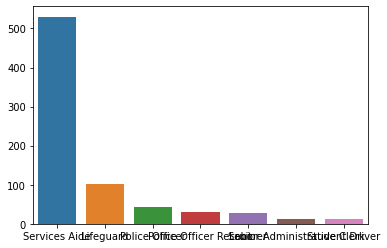

In [24]:
a =CoF[CoF.loan_status == 0]
a.annual_inc.describe()
x= a.job_title.value_counts().keys()[:5]
y=a.job_title.value_counts().values[:5]
sns.barplot(x= a.job_title.value_counts().keys()[:7],y=a.job_title.value_counts().values[:7],data=a)

Text(0.5, 0, 'Loan repayment')

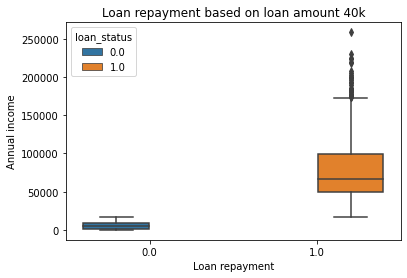

In [27]:
plt.title("Loan repayment based on loan amount 40k")
sns.boxplot(y= 'annual_inc',x='loan_status',data = CoF,hue='loan_status')
plt.ylabel("Annual income")
plt.xlabel("Loan repayment")

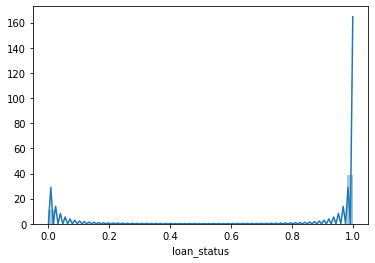

In [ ]:
sns.distplot(CoF.loan_status)

In [ ]:
# sns.scatterplot(x='annual_inc',y='')
CoFG = CoF.groupby('loan_status').size()
CoFG
# sns.boxplot(x= 'loan_status',y='annual_inc',data=CoFG)

loan_status
0.0     950
1.0    3330
dtype: int64

In [ ]:
# Plotting and Figures:                               #FOR POWERPOINT

a_ag = a.agg({'loan_status':'count','annual_inc':['mean'],'funded_amnt':'mean'})
a_ag
# 
double['funded_amnt'].value_counts().head(10).plot(kind='barh')
plt.ylabel("loan amount")
plt.xlabel("occurences")
#
double['loan_status'].value_counts().head(30).plot(kind='pie')
#
CoF['job_title'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
# sns.distplot(CoF.annual_inc,kde=True)
# sns.regplot(y='dti',x='loan_status',data = double)
# CoF = CoF[CoF['annual_inc']>=1000]
# CoF.count()
# plt.figure(figsize=(20,5))
# sns.relplot(y='job_title',x='annual_inc',data=CoF,height=4,aspect=1)

# Top 10 Occupations
# Police Officer -
# Services Aide -
# Bus Driver  -
# Police Sergeant -
# Lifeguard -
# Firefighter Specialist  -
# Laborer -
# Firefighter
# Fire Captain
# # Sanitation Operator
a = CoF[CoF['job_title']=='Police Officer']
b = CoF[CoF['job_title']=='Lifeguard']
c = CoF[CoF['job_title']=='Services Aide']
d = CoF[CoF['job_title']=='Police Sergeant']
e = CoF[CoF['job_title']=='Bus Driver']
f = CoF[CoF['job_title'] == 'Firefighter Specialist']
g = CoF[CoF['job_title']=='Laborer']
h = CoF[CoF['job_title'] == 'Firefighter Specialist']
i = CoF[CoF['job_title'] == 'Sanitation Operator']
#  x = CoF[CoF['annual_inc']<=80000]
#  y = CoF[CoF['annual_inc'] >= 60000]
a = pd.merge(a,b,how='outer')
a = pd.merge(a,c,how='outer')
a = pd.merge(a,d,how='outer')
a = pd.merge(a,e,how='outer')
a = pd.merge(a,f,how='outer')
a = pd.merge(a,g,how='outer')
a = pd.merge(a,h,how='outer')
a = pd.merge(a,i,how='outer')
# a.job_title.value_counts()
bb = a.groupby(['job_title'])
b_ag = bb.agg({'annual_inc':'mean'})
b_ag
plt.figure(figsize=(15,4))
sns.barplot(x='job_title',y='annual_inc',data=b_ag.reset_index())
plt.ylabel('Mean Income')

# # a.describe()
# # a.job_title.value_counts()
# # x = a[a['annual_inc'] < 70000]
# # y = a[a['annual_inc'] > 40000]
# # a = pd.merge(x,y,how='inner')

# # sns.scatterplot(y='job_title',x='annual_inc',data = a)

# #  a = a[a['job_title']=='Police Officer']
# sns.barplot(y= 'job_title',x='annual_inc',data = a,hue='job_title')


NameError: ignored

In [ ]:
# The first 
# testG = CoF.groupby(['job_title','loan_status'])
# testG = CoF[(CoF.job_title == 'Police Officer')|
#             (CoF.job_title == 'Firefighter')|
#             (CoF.job_title == 'Services Aide')|
#             (CoF.job_title == 'Police Sergeant')|
#             (CoF.job_title == 'Bus Driver')|
#             (CoF.job_title == 'Laborer')|
#             (CoF.job_title == 'Firefighter Specialist')|
#             (CoF.job_title == 'Sanitation Operator')|
#             (CoF.job_title == 'Lifegaurd')
#             ]
# testG = CoF[(CoF.loan_status == 0) & (CoF.annual_inc >=10000) & (CoF.annual_inc < 30000)]
# sns.scatterplot(x = '',y = 'loan_status',data=testG)
# plt.pie(testG.loan_status)
# testG.job_title.value_counts().values[:5]
# testG = testG.groupby(['job_title','loan_status'])#.agg(lambda x:x.value_counts().index[0])
# testG = testG[testG.job_title =='Accounting Technician']
# testagg = testG.agg({'job_title':'count','annual_inc': 'mean', 'int_rate':'mean','installment':'mean'})
# testagg
# sns.barplot(x = 'job_title',y = 'loan_status',data=testG)
# testG.sample()
# sns.scatterplot(y='annual_inc',x= 'loan_status',data=testG)
# sns.distplot(testG.annual_inc)


In [ ]:

plt.hist(CoFG,100)
plt.xlabel('loan_status')
plt.ylabel('Frequency')
plt.title('loan_status')
plt.show()

NameError: ignored